In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency

df = pd.read_excel('sales_data_sample.xlsx')
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


Độ lệch của dữ liệu SALES ban đầu: 1.160458972499323
Độ lệch của dữ liệu SALES sau khi biến đổi log: -0.20150542936667845


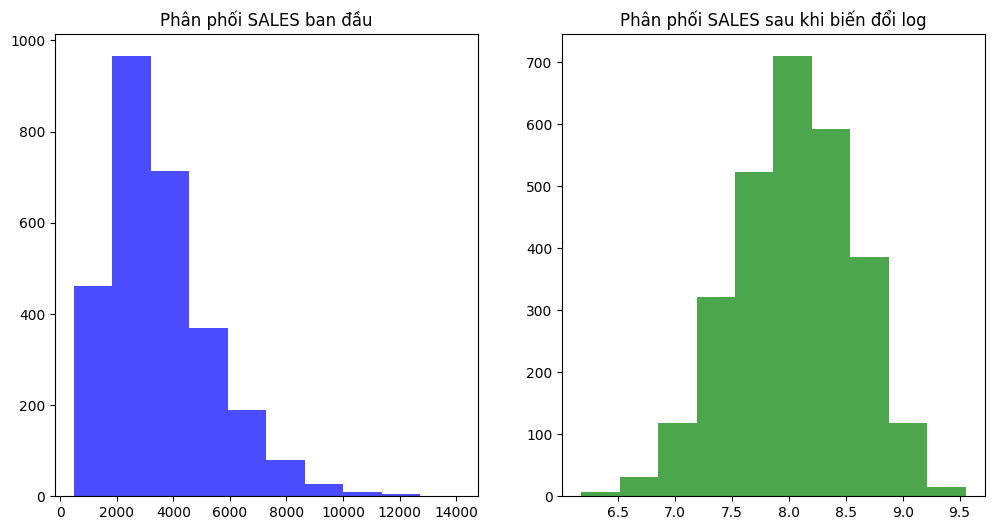

In [11]:
from scipy.stats import skew
original_skewness = skew(df['SALES'])
print(f"Độ lệch của dữ liệu SALES ban đầu: {original_skewness}")

# Áp dụng biến đổi log lên SALES (thêm 1 để tránh log(0))
df['log_SALES'] = np.log(df['SALES'] + 1)

# Tính độ lệch của dữ liệu sau khi biến đổi log
log_skewness = skew(df['log_SALES'])
print(f"Độ lệch của dữ liệu SALES sau khi biến đổi log: {log_skewness}")
# Vẽ biểu đồ phân phối trước và sau khi biến đổi log
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(df['SALES'], bins=10, color='blue', alpha=0.7)
ax[0].set_title('Phân phối SALES ban đầu')

ax[1].hist(df['log_SALES'], bins=10, color='green', alpha=0.7)
ax[1].set_title('Phân phối SALES sau khi biến đổi log')

plt.show()

In [8]:
order_lines = df.groupby('ORDERNUMBER').size()

# Đơn hàng có nhiều dòng đặt hàng nhất
max_order_lines = order_lines.max()

print(f"Số dòng đặt hàng nhiều nhất trong một đơn hàng là: {max_order_lines}")

Số dòng đặt hàng nhiều nhất trong một đơn hàng là: 18


In [12]:
X = df[['QUANTITYORDERED', 'SALES', 'Discount']]
y = df['Profit']

# Thêm cột hằng số vào X cho mô hình hồi quy
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Xem kết quả hồi quy
print(model.summary())

# Lấy hệ số hồi quy của các biến
coefficients = model.params
print("\nHệ số hồi quy của các biến:")
print(coefficients)

# Thứ tự tác động của các biến độc lập dựa trên độ lớn hệ số hồi quy
impact_order = coefficients.abs().sort_values(ascending=False)
print("\nThứ tự mức độ tác động từ cao đến thấp:")
print(impact_order)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           3.74e-40
Time:                        18:53:43   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              54.7781     13.377     

In [13]:
correlation = df['QUANTITYORDERED'].corr(df['SALES'])

print(f"Tương quan giữa QUANTITYORDERED và SALES: {correlation}")

Tương quan giữa QUANTITYORDERED và SALES: 0.551426191918357


<Figure size 1000x600 with 0 Axes>

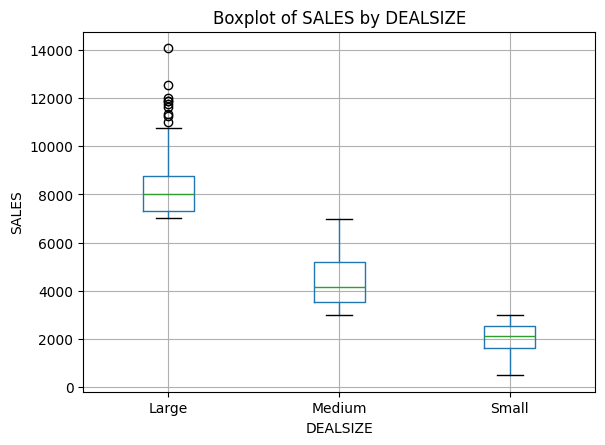

      ORDERNUMBER  QUANTITYORDERED  ORDERLINENUMBER    SALES  ORDERDATE  \
0           10107               30                2  2871.00 2003-02-24   
1           10121               34                5  2765.90 2003-05-07   
2           10134               41                2  3884.34 2003-07-01   
3           10145               45                6  3746.70 2003-08-25   
4           10159               49               14  5205.27 2003-10-10   
...           ...              ...              ...      ...        ...   
2818        10350               20               15  2244.40 2004-12-02   
2819        10373               29                1  3978.51 2005-01-31   
2820        10386               43                4  5417.57 2005-03-01   
2821        10397               34                1  2116.16 2005-03-28   
2822        10414               47                9  3079.44 2005-05-06   

        STATUS  COUNTRY DEALSIZE  Discount    Profit  log_SALES  
0      Shipped      USA    Small 

C:\Users\DELL\AppData\Local\Temp\ipykernel_13784\2061229918.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SALES'].fillna(median_sales_medium, inplace=True)


In [14]:
plt.figure(figsize=(10, 6))
df.boxplot(column='SALES', by='DEALSIZE')
plt.title('Boxplot of SALES by DEALSIZE')
plt.suptitle('')  # Remove the default 'Boxplot grouped by DEALSIZE' title
plt.xlabel('DEALSIZE')
plt.ylabel('SALES')
plt.show()

# Tính toán giá trị trung bình (mean) và trung vị (median) cho nhóm DEALSIZE = Medium
median_sales_medium = df[df['DEALSIZE'] == 'Medium']['SALES'].median()

# Thay thế dữ liệu thiếu bằng giá trị trung vị
df['SALES'].fillna(median_sales_medium, inplace=True)

# Kiểm tra dữ liệu đã được thay thế
print(df)

In [15]:
from sklearn.linear_model import LinearRegression

# Giả sử df là DataFrame chứa dữ liệu của bạn
X = df[['QUANTITYORDERED', 'SALES', 'Discount']]  # Các biến độc lập
y = df['Profit']  # Biến phụ thuộc

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Các hệ số hồi quy
beta_0 = model.intercept_
beta_1, beta_2, beta_3 = model.coef_

# Dự đoán giá trị lợi nhuận
predicted_profit = (beta_0 + 
                    beta_1 * quantity_ordered + 
                    beta_2 * sales + 
                    beta_3 * discount)

print(f"Dự đoán giá trị lợi nhuận: {predicted_profit:.2f}")

NameError: name 'quantity_ordered' is not defined

In [18]:
mean = np.mean(df['SALES'])

# Tính độ lệch chuẩn
std_dev = np.std(df['SALES'], ddof=0)  # ddof=0 để tính độ lệch chuẩn mẫu

print(f"Giá trị trung bình là: {mean:.2f}")
print(f"Độ lệch chuẩn là: {std_dev:.2f}")

# Giá trị Z-score đã biết
z_score = 0.25

# Tính giá trị trước chuẩn hóa
value_before_scaling = z_score * std_dev + mean

print(f"Giá trị trước chuẩn hóa là: {value_before_scaling:.2f}")

Giá trị trung bình là: 3553.89
Độ lệch chuẩn là: 1841.54
Giá trị trước chuẩn hóa là: 4014.27


In [16]:
X = df[['QUANTITYORDERED', 'SALES', 'Discount']]
X = sm.add_constant(X)  # Thêm cột chặn vào ma trận thiết kế

y = df['Profit']

model = sm.OLS(y, X).fit()  # Tạo mô hình hồi quy tuyến tính
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           3.74e-40
Time:                        19:09:25   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              54.7781     13.377     

In [24]:
from scipy.stats import f_oneway
grouped = df.groupby('STATUS')['SALES'].apply(list)

# Thực hiện phân tích ANOVA
anova_result = f_oneway(*grouped)

print(f"Giá trị p của ANOVA: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Có sự khác biệt đáng kể về giá trị đặt hàng giữa các trạng thái giao hàng.")
else:
    print("Không có sự khác biệt đáng kể về giá trị đặt hàng giữa các trạng thái giao hàng.")

Giá trị p của ANOVA: 0.0037
Có sự khác biệt đáng kể về giá trị đặt hàng giữa các trạng thái giao hàng.


In [22]:
sales_min = df['SALES'].min()
sales_max = df['SALES'].max()

# Danh sách các giá trị cần chuẩn hóa
sales_values = np.arange(50, 60)  # Từ 50 đến 59

# Tính giá trị đã chuẩn hóa
scaled_values = (sales_values - sales_min) / (sales_max - sales_min)

print("Giá trị đã chuẩn hóa của SALES từ 50 đến 59 là:")
for original, scaled in zip(sales_values, scaled_values):
    print(f"{original}: {scaled:.2f}")

Giá trị đã chuẩn hóa của SALES từ 50 đến 59 là:
50: -0.03
51: -0.03
52: -0.03
53: -0.03
54: -0.03
55: -0.03
56: -0.03
57: -0.03
58: -0.03
59: -0.03
